# 03_modeling.ipynb - Solar Power Forecasting Models
Train baseline and advanced models using engineered features.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Load data
df = pd.read_csv('../data/processed/feature_engineered_data.csv', parse_dates=['DATE_TIME'])
df = df.set_index('DATE_TIME')

In [20]:
df

,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,...,AC_POWER_lag1,IRRADIATION_lag1,AC_POWER_lag2,IRRADIATION_lag2,AC_POWER_lag3,IRRADIATION_lag3,AC_POWER_roll_mean_3h,IRRADIATION_roll_mean_3h,AC_POWER_roll_mean_6h,IRRADIATION_roll_mean_6h
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,0.0,7038681.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2020-05-15 00:00:00,4135001,rGa61gmuvPhdLxV,0.0,0.0,0.0,7111493.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2020-05-15 00:00:00,4135001,pkci93gMrogZuBj,0.0,0.0,0.0,7169102.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2020-05-15 00:00:00,4135001,ih0vzX44oOqAx2f,0.0,0.0,0.0,6185184.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2020-05-15 00:00:00,4135001,iCRJl6heRkivqQ3,0.0,0.0,0.0,7177992.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,6034.0,6433566.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,...,0.0,0.0,0.0,0.0,0.0,0.0,1.231015e-12,0.0,0.0,0.0
2020-06-17 23:45:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,5521.0,6485319.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,...,0.0,0.0,0.0,0.0,0.0,0.0,1.231015e-12,0.0,0.0,0.0
2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.0,6583369.0,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,...,0.0,0.0,0.0,0.0,0.0,0.0,1.231015e-12,0.0,0.0,0.0


In [30]:

df = df.drop(columns=['PLANT_ID_y','SOURCE_KEY_y','SOURCE_KEY_x'])

In [31]:
df

,PLANT_ID_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,hour,day,...,AC_POWER_lag1,IRRADIATION_lag1,AC_POWER_lag2,IRRADIATION_lag2,AC_POWER_lag3,IRRADIATION_lag3,AC_POWER_roll_mean_3h,IRRADIATION_roll_mean_3h,AC_POWER_roll_mean_6h,IRRADIATION_roll_mean_6h
DATE_TIME,,,,,,,,,,,,,,,,,,,,,
2020-05-15 00:00:00,4135001,0.0,0.0,0.0,7038681.0,25.184316,22.857507,0.0,0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2020-05-15 00:00:00,4135001,0.0,0.0,0.0,7111493.0,25.184316,22.857507,0.0,0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2020-05-15 00:00:00,4135001,0.0,0.0,0.0,7169102.0,25.184316,22.857507,0.0,0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2020-05-15 00:00:00,4135001,0.0,0.0,0.0,6185184.0,25.184316,22.857507,0.0,0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
2020-05-15 00:00:00,4135001,0.0,0.0,0.0,7177992.0,25.184316,22.857507,0.0,0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,4135001,0.0,0.0,6034.0,6433566.0,21.909288,20.427972,0.0,23,17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.231015e-12,0.0,0.0,0.0
2020-06-17 23:45:00,4135001,0.0,0.0,5521.0,6485319.0,21.909288,20.427972,0.0,23,17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.231015e-12,0.0,0.0,0.0
2020-06-17 23:45:00,4135001,0.0,0.0,5817.0,6583369.0,21.909288,20.427972,0.0,23,17,...,0.0,0.0,0.0,0.0,0.0,0.0,1.231015e-12,0.0,0.0,0.0


In [50]:
# Define features and target
features = ['hour', 'day', 'month', 'dayofweek', 'is_weekend',
    'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
    'AC_POWER_lag1', 'AC_POWER_roll_mean_3h', 'PLANT_ID_x']
target = 'AC_POWER'
X = df[features]
y = df[target]

In [52]:
X

,hour,day,month,dayofweek,is_weekend,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER_lag1,AC_POWER_roll_mean_3h,PLANT_ID_x
DATE_TIME,,,,,,,,,,,
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.0,0.0,0.000000e+00,4135001
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.0,0.0,0.000000e+00,4135001
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.0,0.0,0.000000e+00,4135001
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.0,0.0,0.000000e+00,4135001
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.0,0.0,0.000000e+00,4135001
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 23:45:00,23,17,6,2,0,21.909288,20.427972,0.0,0.0,1.231015e-12,4135001
2020-06-17 23:45:00,23,17,6,2,0,21.909288,20.427972,0.0,0.0,1.231015e-12,4135001
2020-06-17 23:45:00,23,17,6,2,0,21.909288,20.427972,0.0,0.0,1.231015e-12,4135001


In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (36540, 11) Test shape: (9135, 11)


In [54]:
X_train

,hour,day,month,dayofweek,is_weekend,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,AC_POWER_lag1,AC_POWER_roll_mean_3h,PLANT_ID_x
DATE_TIME,,,,,,,,,,,
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.000000,0.000000,0.000000,4135001
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.000000,0.000000,0.000000,4135001
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.000000,0.000000,0.000000,4135001
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.000000,0.000000,0.000000,4135001
2020-05-15 00:00:00,0,15,5,4,0,25.184316,22.857507,0.000000,0.000000,0.000000,4135001
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-13 15:30:00,15,13,6,5,1,28.112844,46.239712,0.566993,740.137500,705.058333,4135001
2020-06-13 15:30:00,15,13,6,5,1,28.112844,46.239712,0.566993,686.825000,686.983333,4135001
2020-06-13 15:30:00,15,13,6,5,1,28.112844,46.239712,0.566993,633.987500,693.191667,4135001


In [55]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [56]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [58]:
# Evaluation metrics
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} → RMSE: {rmse:.2f}, MAE: {mae:.2f}")

evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

Linear Regression → RMSE: 41.79, MAE: 12.08
Random Forest → RMSE: 43.62, MAE: 11.67


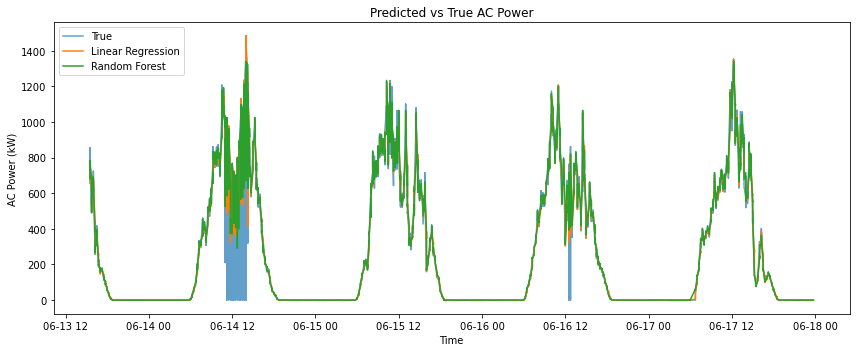

In [59]:
# Plot predictions
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label='True', alpha=0.7)
plt.plot(y_test.index, y_pred_lr, label='Linear Regression')
plt.plot(y_test.index, y_pred_rf, label='Random Forest')
plt.legend()
plt.title("Predicted vs True AC Power")
plt.ylabel("AC Power (kW)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

In [63]:
# Save model predictions
pred_df = pd.DataFrame({
    'True': y_test.values,
    'LR_Pred': y_pred_lr,
    'RF_Pred': y_pred_rf
}, index=y_test.index)
pred_df.to_csv('../reports/model_predictions.csv')

'/Users/aravindraju/Documents/git/solar power prediction/noteboook'

In [65]:
import joblib
joblib.dump(rf, '../models/rf_model.pkl')


['../models/rf_model.pkl']

In [46]:
import sklearn
print(sklearn.__version__)

1.0.2


In [47]:
print(X_train.columns)

Index(['PLANT_ID_x', 'DC_POWER', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION', 'hour', 'day', 'dayofweek',
       'month', 'is_weekend', 'AC_POWER_lag1', 'IRRADIATION_lag1',
       'AC_POWER_lag2', 'IRRADIATION_lag2', 'AC_POWER_lag3',
       'IRRADIATION_lag3', 'AC_POWER_roll_mean_3h', 'IRRADIATION_roll_mean_3h',
       'AC_POWER_roll_mean_6h', 'IRRADIATION_roll_mean_6h'],
      dtype='object')


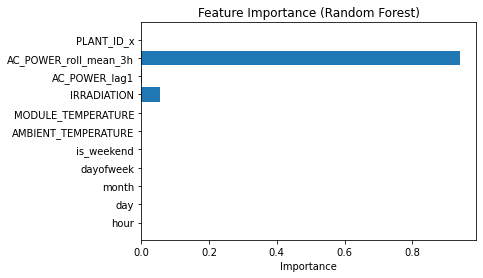

In [60]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()
